Mona Mokart
___________________________________________________________________________________

# TP2 SD204 : Linear Regression

In [37]:
# to write correctly the name of the notebook file

fn1 = "mona"
ln1 = "mokart"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
print(filename)

sd-tsia204_lab2_mokart_mona.ipynb


In [38]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import t

# Question 1
- **Load the data from data_tp_2.csv. Plot the median and standard deviation of every covariate in a single plot. Is the data centered? Normalized? Standardized?**

In [39]:
data = pd.read_csv('data_tp_2.csv', sep=',')
data

,X76,X95,X52,X36,X74,X69,X23,X27,X19,X39,...,X45,X67,X16,X37,X56,X35,X87,X89,X96,Y
0,-0.208298,0.793446,-0.200865,-0.005766,-0.336092,0.037238,0.148319,-1.423624,-0.411594,0.541975,...,-0.216825,0.552672,0.499400,0.134669,-1.639742,-0.004640,-0.635006,-0.758949,0.488324,24.0
1,-0.221028,-0.363311,-0.631604,1.152664,-0.532182,1.176513,-0.100142,1.170051,0.360931,0.593115,...,0.571930,-0.186832,-0.238081,1.404931,0.489104,0.248675,0.361039,0.435418,-1.324025,21.6
2,-1.059124,-0.777557,-0.172609,0.767116,0.141027,0.677921,0.820292,-0.255193,0.691621,0.254366,...,-0.643929,-0.543850,-0.478493,-0.386637,0.175114,-0.658092,-0.338583,-0.177981,-0.050339,34.7
3,1.133450,-0.790638,-0.586627,0.942378,0.283674,-0.577118,-0.145977,-0.263209,1.435926,-0.750034,...,0.719154,0.056236,-0.495367,0.204324,-1.078683,0.640999,-0.921276,-0.602238,0.421393,33.4
4,0.908181,-0.913293,0.362265,-0.437131,0.514517,-1.625222,1.019997,-0.422887,0.140903,-0.073760,...,1.026587,-0.230706,0.151710,-0.638937,0.072631,-0.517829,-1.028707,0.465484,0.351005,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.608114,0.938399,0.051940,-0.972496,-0.455969,0.160660,-0.818642,-0.483332,-0.311482,0.723593,...,0.172286,0.162128,0.447561,0.392702,0.098069,0.886292,0.070858,0.032393,0.340219,22.4
502,-0.154366,0.324157,-0.382372,-0.085913,-0.315436,-0.505230,0.396888,1.190629,-0.072879,-0.155551,...,1.579612,-0.196807,0.942472,-0.603286,-0.618815,-0.348162,0.743787,0.443682,0.201446,20.6
503,-0.334168,0.902759,0.845292,0.474392,-0.329404,-0.020669,0.298615,-0.151245,0.163579,-0.174481,...,0.473958,0.671534,-0.103124,0.867858,0.105762,-0.561985,0.891691,0.439631,0.432772,23.9
504,0.833393,-0.809250,-0.548674,0.047740,0.528402,-0.074027,0.643996,1.077708,-0.342874,0.791408,...,-1.153192,1.039399,0.384485,0.035854,0.654475,-0.034259,-0.853840,0.649302,0.051112,22.0


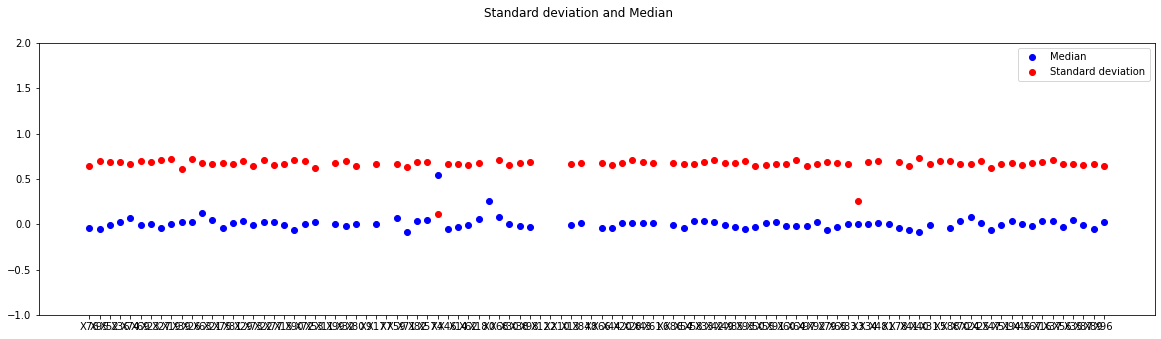

In [40]:
X = data.copy()
del X['Y']
X_mean = X.mean(axis=0)
X_sdt = X.std(axis=0)

fig = plt.figure(figsize=(20, 5))
plt.scatter(X.columns, X_median, color='b', label="Median")
plt.scatter(X.columns, X_sdt, color='r', label="Standard deviation")
plt.suptitle('Standard deviation and Median')
plt.ylim((-1, 2))
plt.legend()

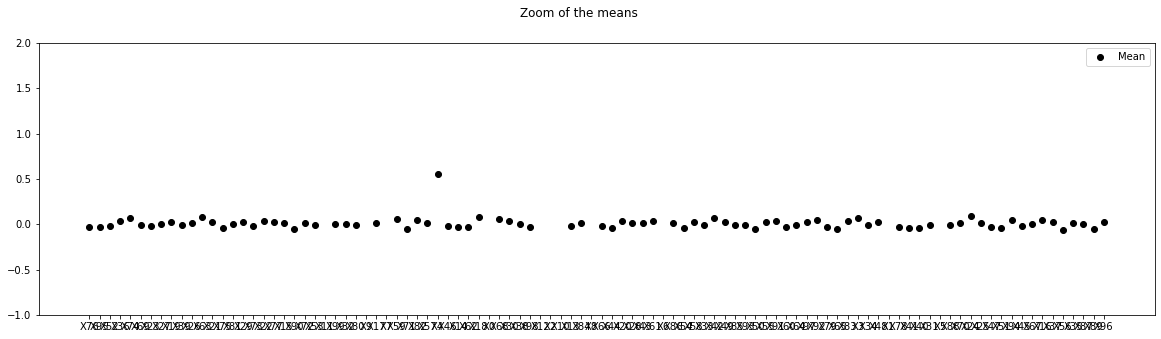

In [41]:
fig = plt.figure(figsize=(20, 5))
plt.scatter(X.columns, X_mean, color='k', label="Mean")
plt.suptitle('Zoom of the means')
plt.ylim((-1, 2))
plt.legend()

Globaly the majority of the covariates seems to be centered, but not exactly and there are some covariates which are not centred at all. 
Regarding the standard deviations which are closed to 0.7 (excepted few covariates), we can't say that the data is standardized. 

- **Separate the data frame in two matrices, X and Y , containing the input and output data respectively.**
- **Separate the covariate data in train and test sets. Save one fourth of the data as testing.**

In [42]:
Y = data['Y'].copy()  # transform X and Y into numpy array
Columns = X.columns
X = X.to_numpy()
Y = Y.to_numpy()
X0 = X.copy()
Y0 = Y.copy()

rdint = np.random.randint(100)
print(rdint)

np.random.seed(rdint)  # random shuffle in X and Y
np.random.shuffle(X)
np.random.seed(rdint)
np.random.shuffle(Y)

X_train = X[:379].copy()  # split into train and test data
X_test = X[379:].copy()
Y_train = Y[:379].copy()
Y_test = Y[379:].copy()

39


- **Center and standarize the train and test data and plot its mean and variance again. You can use the function fit_transform.**

In [43]:
import sklearn.preprocessing
ss = sklearn.preprocessing.StandardScaler()

X_train_sc = ss.fit_transform(X_train)  # scaled datas
X_test_sc = ss.fit_transform(X_test)

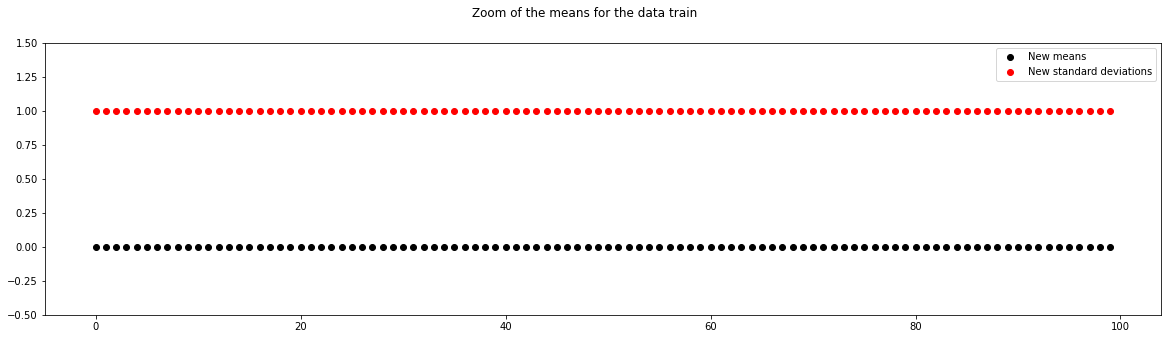

In [44]:
fig = plt.figure(figsize=(20, 5))
plt.scatter(range(X_train_sc.shape[1]), X_train_sc.mean(axis=0), color='k',
            label="New means")

plt.scatter(range(X_train_sc.shape[1]), X_train_sc.std(axis=0), color='r',
            label="New standard deviations")

plt.suptitle('Zoom of the means for the data train')
plt.ylim((-0.5, 1.5))
plt.legend()

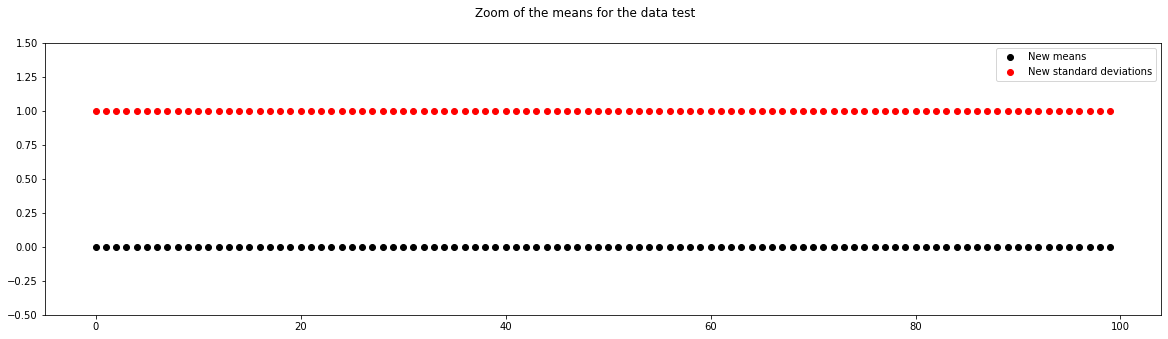

In [45]:
fig = plt.figure(figsize=(20, 5))
plt.scatter(range(X_test_sc.shape[1]), X_test_sc.mean(axis=0),
            color='k', label="New means")

plt.scatter(range((X_test_sc.shape[1])), X_test_sc.std(axis=0),
            color='r', label="New standard deviations")

plt.suptitle('Zoom of the means for the data test')
plt.ylim((-0.5, 1.5))
plt.legend()

We can see that now the train data and the test data are standardized

- **Why is it important the the variables are scaled? You can elaborate the answer focussing on the Lasso method.**

We need to have standardized data because for the LASSO method we have a penalisation term $\lambda$, and if the $x_i$ are not scaled $\lambda$ won't penalize each coefficient of $\theta$ equally

- **Create two empty dataFrames of names df_test and df_coef.**

In [46]:
# create new empty df
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

# Question 2
- **Write a function to compute the determination coefficient and another to compute the mean squared error.**

In [47]:
def R2(Y, Yhat):
    num = np.linalg.norm((Y-Yhat))**2
    den = np.linalg.norm((Y-Y.mean(axis=0)))**2
    return (1-num/den)


def MSE(Y, Yhat):
    return np.sum((Yhat-Y)**2)/len(Y)

# Question 3

- **apply the linear regression of the sklearn library to the low dimensional data**
- **print the determination coefficient and the MSE of the test data**

In [48]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_sc, Y_train)
Y_hat = reg.predict(X_test_sc)

print("R² for the test data:", R2(Y_test, Y_hat))
print("R² for the train data:", reg.score(X_train_sc, Y_train))
print("Mean squared error :", MSE(Y_test, Y_hat))

R² for the test data: 0.6146882788132417
R² for the train data: 0.8099737692071022
Mean squared error : 25.507603453014084


- **add a column named OLS to the df_test dataframe that contains the predicted values for the sample and**
- **add a column named OLS to the df_coef dataframe that contains the estimated coefficients.**

In [49]:
df_test['OLS'] = Y_hat
df_coef['OLS'] = reg.coef_

# Question 4
**Plot a heatmap of the covariance matrix.**

**Compute the singular value decomposition of the covariance matrix. For consistency in the notation use U,s,V = SVD(M)** (I think this is a mistake and the instruction is either eigen value decomposition of cov(X) or singular value decomposition of X)

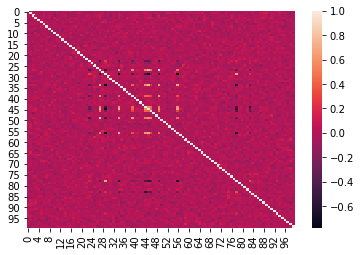

In [50]:
import seaborn as sn
cov = (X_train_sc.T@X_train_sc)/len(X_train_sc)
sn.heatmap(cov)

Here one can see that the scaled covariates are independants and their variance is 1 for each one because the Cov(X)ij=cov(Xi,Xj)

In [51]:
# cov(Xtrainsc) = USVt
U, s, Vt = np.linalg.svd(X_train_sc.T@X_train_sc/len(X_train_sc))

V = Vt.T
S = np.diag(s)
S = np.concatenate((S, np.zeros((len(X_train_sc.T@X_train_sc)-len(s), len(s)))), axis=0)

# Question 5
- **Plot the first 2 PC of the train data.**

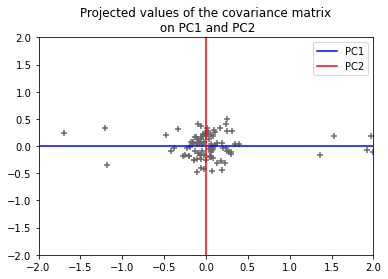

In [52]:
plt.scatter((U@S)[:, 0], (U@S)[:, 1], marker='+', color='dimgray')  # US=XtrainscV
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.axhline(0, color='b', label='PC1')
plt.axvline(0, color='r', label='PC2')
plt.title("Projected values of the covariance matrix\n on PC1 and PC2")
plt.legend()

Here I've plot the covariance matrix of Xtrainsc only with its firt two directions. We can see that the values with respect to the first PC are a bit larger than the ones with respect to the second PC

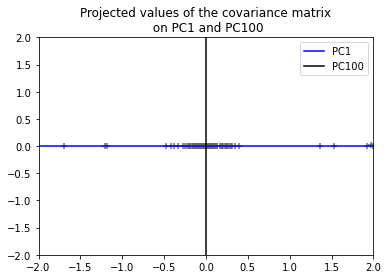

In [53]:
plt.scatter((U@S)[:, 0], (U@S)[:, 99], marker='+', color="dimgray")
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.axhline(0, color='b', label='PC1')
plt.axvline(0, color='k', label='PC100')
plt.title("Projected values of the covariance matrix\n on PC1 and PC100")
plt.legend()

Here, I've plot the covariance matrix of Xtrainsc with its projections on PC1 and PC100. We can see that the data is almost all contained in PC1 in comparaison to PC100

# Question 6
- **Compute projected data for both the train and the test data**
- **apply the linear regression of the sklearn library to the low dimensional data,**
- **print the determination coefficient and the MSE of the test data**

In [54]:
X_train_pca = X_train_sc@U[:, :2]
X_test_pca = X_test_sc@U[:, :2]

print("Shape of the train new train data :", X_train_pca.shape)
print("Shape of the train new test data :", X_test_pca.shape)

reg2 = LinearRegression().fit(X_train_pca, Y_train)
Y_hat2 = reg2.predict(X_test_pca)

print("\nR² for the test data:", R2(Y_test, Y_hat2))
print("R² for the train data:", reg2.score(X_train_pca, Y_train))
print("Mean squared error :", MSE(Y_hat2, Y_test))

Shape of the train new train data : (379, 2)
Shape of the train new test data : (127, 2)

R² for the test data: 0.41306622028578843
R² for the train data: 0.37078848413122134
Mean squared error : 38.85496672672553


- **add a column named pca_ols to the df_test dataframe that contains the predicted values for the test sample.**

In [55]:
df_test['pca_OLS'] = Y_hat2

# Question 7

- **Compute and plot the absolute values of the loadings on the first two PC.**

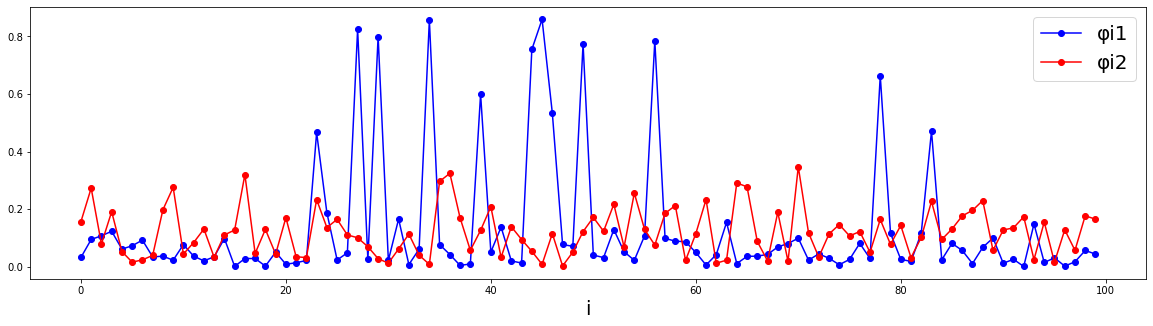

In [56]:
fig = plt.figure(figsize=(20, 5)) 
plt.plot(range(U.shape[0]), (np.abs(U@(S**0.5)))[:, 0], '-o',color='b', label='φi1')
plt.plot(range(U.shape[0]), (np.abs(U@(S**0.5)))[:, 1], '-o',color='r', label='φi2')
plt.xlabel("i", fontsize=20)
plt.legend(fontsize=20)

We assume that for the notations, $\phi = (\phi_1,...,\phi_p)$
We can see that $\phi_1$ has a larger variance than $\phi_2$ which seems coherent since the singular values are orderer. So the loadings of PC1 should have larger weights. Since we reduce the data in only 2 dimension instead of 100, it is logical to keep the ones which have bigger weights, the more information as possible.

# Question 8
### Lasso
- **apply the LassoCV of the sklearn library: it uses cross-validation internally for different values of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a log scale beteween 10e-3 and 10e1 (see function np.logspace),**
- **print the determination coefficient and the MSE of the test data,**
- **print the regulatization parameter that the algorithm selects,**

In [57]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-3, 1, 30)
regLASSO = LassoCV(alphas=alphas).fit(X_train_sc, Y_train)
Y_hat3 = regLASSO.predict(X_test_sc)

print("R² for the test data:", R2(np.array(Y_test), Y_hat3))
print("R² for the train data :", regLASSO.score(X_train_sc, Y_train))
print("Mean squared error :", MSE(Y_hat3, Y_test))
print("Alpha selected :", regLASSO.alpha_)

R² for the test data: 0.7130325872273158
R² for the train data : 0.7565500516294803
Mean squared error : 18.997218528411064
Alpha selected : 0.2212216291070448


- **add a column named lasso to the df_test dataframe that contains the predicted values for the sample and**
- **add a column named lasso to the df_coef dataframe that contains the estimated coefficients.**

In [58]:
df_test['lasso'] = Y_hat3
df_coef['lasso'] = regLASSO.coef_

# Question 9 
### Ridge
- **apply the RidgeCV of the sklearn library: it uses crossvalidation internally for different values of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a log scale beteween 10e-1 and 10e2 (see function np.logspace).**
- **print the determination coefficient and the MSE of the test data, print the regulatization parameter that the algorithm selects,**

In [59]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-1, 2, 30)
regRIDGE = RidgeCV(alphas=alphas).fit(X_train_sc, Y_train)
Y_hat4 = regRIDGE.predict(X_test_sc)

print("R² for the test data:", R2(np.array(Y_test), Y_hat4))
print("R² for the train data :", regRIDGE.score(X_train_sc, Y_train))
print("Mean squared error :", MSE(Y_hat4, Y_test))
print("Alpha selected :", regRIDGE.alpha_)

R² for the test data: 0.6533690610594074
R² for the train data : 0.7977828521765796
Mean squared error : 22.946938929887995
Alpha selected : 38.56620421163472


- **add a column named Ridge to the df_coef dataframe that contains the predicted values for the sample and**
- **add a column named Ridge to the df_coef dataframe that contains the estimated coefficients.**

In [60]:
df_test['Ridge'] = Y_hat4
df_coef['Ridge'] = regRIDGE.coef_

# Question 10
- **Provide the order of the variable selection.**

In [61]:
# FVS for all variables
Un = np.ones((len(Y_train), 1))
X_tilde = np.concatenate((Un, X_train_sc), axis=1)
n = len(X_tilde)
p2 = X_tilde.shape[1]

rest = list(range(p2))
r = Y_train
order = []
all_values = []
p_values = []


for step in range(p2):
    listp = []
    values = []

    for k in rest:
        betak = X_tilde[:, k].T@r/(X_tilde[:, k].T@X_tilde[:, k])  # betak = XtY/(XtX)
        r_hat = betak*X_tilde[:, k]

        sk = (np.sum((r-r_hat)**2)/((n-1)*np.sum(X_tilde[:, k]**2)))**0.5
        value = betak/sk
        values.append([k, abs(value)])

        p_value = 2*(1-t.cdf(abs(value), n-1))
        listp.append([abs(value), p_value, k, r_hat])

    listp.sort()
    listp.reverse()  # to get the variable with the largest test statistic

    order.append(listp[0][2])  # ordre des variabmes sélectionnées
    rest.remove(listp[0][2])

    p_values.append(listp[0][1])  # p_values dans l'ordre de selection

    r = listp[0][3] - r

    if step < 3:
        all_values.append(values)


new_order = [val-1 for val in order[1:]]
print("The selected variables are :", new_order)
realorder = []
for val in new_order:
    realorder.append(Columns[val])
print("\n\nWhich correspond to the columns :", realorder)

The selected variables are : [44, 83, 29, 46, 75, 62, 18, 16, 99, 80, 24, 8, 9, 4, 22, 97, 91, 49, 23, 47, 10, 20, 89, 33, 38, 72, 32, 59, 31, 40, 79, 42, 56, 78, 94, 14, 86, 76, 6, 90, 30, 85, 63, 48, 53, 15, 68, 73, 98, 1, 7, 37, 21, 84, 55, 60, 17, 82, 39, 45, 87, 54, 57, 11, 0, 26, 5, 67, 50, 66, 36, 52, 43, 41, 28, 13, 70, 88, 77, 61, 27, 95, 51, 3, 2, 19, 64, 35, 81, 92, 65, 12, 93, 96, 71, 34, 69, 58, 25, 74]


Which correspond to the columns : ['X12', 'X5', 'X7', 'X10', 'X3', 'X49', 'X77', 'X73', 'X96', 'X41', 'X99', 'X19', 'X39', 'X74', 'X53', 'X87', 'X45', 'X8', 'X11', 'X13', 'X26', 'X90', 'X51', 'X57', 'X18', 'X79', 'X82', 'X58', 'X71', 'X68', 'X78', 'X38', 'X6', 'X1', 'X37', 'X81', 'X24', 'X34', 'X23', 'X94', 'X59', 'X70', 'X85', 'X84', 'X28', 'X29', 'X60', 'X65', 'X89', 'X95', 'X27', 'X62', 'X72', 'X88', 'X61', 'X33', 'X22', 'X31', 'X0', 'X2', 'X25', 'X43', 'X86', 'X63', 'X76', 'X80', 'X69', 'X91', 'X66', 'X55', 'X14', 'X20', 'X98', 'X30', 'X17', 'X75', 'X97', 'X47', 'X48'

# Question 11
### FVS stop criterion : p-value < 0.05

In [62]:
# FVS with p-value < 0.05
Un = np.ones((len(Y_train), 1))
X_tilde = np.concatenate((Un, X_train_sc), axis=1)
n = len(X_tilde)
p2 = X_tilde.shape[1]

rest = list(range(p2))
r = Y_train
order2 = []
p_values2 = []


for step in range(p2):
    listp = []

    for k in rest:
        betak = X_tilde[:, k].T@r/(X_tilde[:, k].T@X_tilde[:, k])  # betak = XtY/(XtX)
        r_hat = betak*X_tilde[:, k]

        sk = (np.sum((r-r_hat)**2)/((n-1)*np.sum(X_tilde[:, k]**2)))**0.5
        value = betak/sk

        p_value = 2*(1-t.cdf(abs(value), n-1))
        listp.append([abs(value), p_value, k, r_hat])

    listp.sort()
    listp.reverse()  # to get the variable with the largest test statistic

    if listp[0][1] > 0.05:
        break
    order2.append(listp[0][2])  # ordre des variabmes sélectionnées
    rest.remove(listp[0][2])

    p_values2.append(listp[0][1])  # p_values dans l'ordre de selection

    r = listp[0][3] - r


new_order2 = [val-1 for val in order2[1:]]
print("The selected variables with p-value <0.05 are :", new_order2)
realorder2 = []
for val in new_order2:
    realorder2.append(Columns[val])
print("\n\nWhich correspond to the columns :", realorder2)

The selected variables with p-value <0.05 are : [44, 83, 29, 46, 75, 62, 18, 16, 99, 80, 24]


Which correspond to the columns : ['X12', 'X5', 'X7', 'X10', 'X3', 'X49', 'X77', 'X73', 'X96', 'X41', 'X99']


- **Provide the 3 graphs of the test statistics obtained when selecting the 1st, 2nd and 3rd variables**

Text(0.5, 1.0, 'Test statistics for step 2')

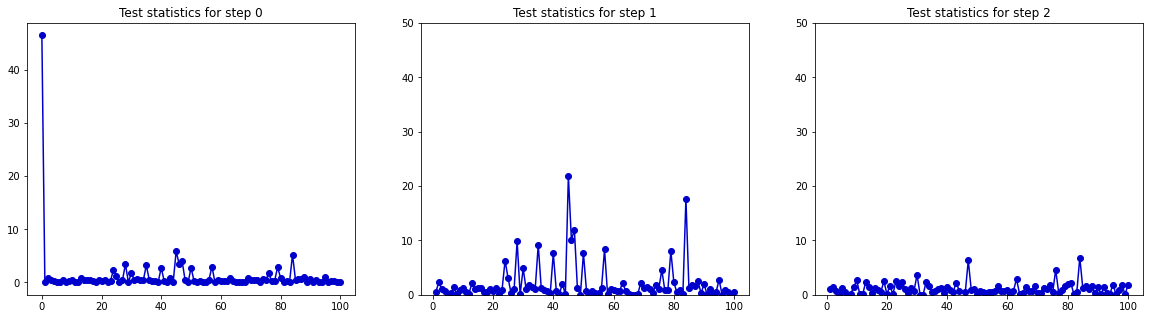

In [63]:
# Test statistics for the first 3 steps
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs = axs.ravel()
graph1 = np.array(all_values[0])
graph2 = np.array(all_values[1])
graph3 = np.array(all_values[2])

axs[0].plot(graph1[:, 0], graph1[:, 1], '-o', c='mediumblue')
axs[0].set_title("Test statistics for step 0")

axs[1].plot(graph2[:, 0], graph2[:, 1], '-o', c='mediumblue')
axs[1].set_ylim(0, 50)
axs[1].set_title("Test statistics for step 1")

axs[2].plot(graph3[:, 0], graph3[:, 1], '-o', c='mediumblue')
axs[2].set_ylim(0, 50)
axs[2].set_title("Test statistics for step 2")

- **Provide the graphs of the first 50 p-values.On the same plot, trace the horizontal line with the ordinate 0.05. Finally, provide the list of the selected variables.**

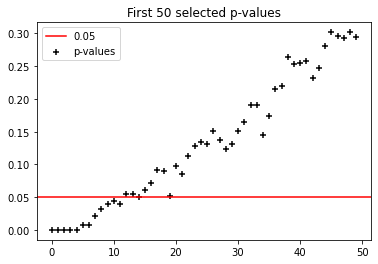

In [64]:
# First 50 selected p-values

plt.scatter(np.arange(50), p_values[:50], color='k', marker='+', label="p-values")
plt.axhline(0.05, color='r', label="0.05")
plt.title("First 50 selected p-values")
plt.legend()

# Question 12
- **Run OLS on the selected variables.**

In [65]:
# new train and tes data
m = len(new_order2)
n1 = len(X_train_sc)
n2 = len(X_test_sc)
X_train_selected = np.zeros((n1, m))
X_test_selected = np.zeros((n2, m))

for j, val in enumerate(new_order2):
    X_train_selected[:, j] = X_train_sc[:, val]
    X_test_selected[:, j] = X_test_sc[:, val]

# OLS regression
regFVS = LinearRegression().fit(X_train_selected, Y_train)
Y_hat5 = regFVS.predict(X_test_selected)
print("R² for the test data:", R2(Y_test, Y_hat5))
print("R² for the train data:", regFVS.score(X_train_selected, Y_train))
print("Mean squared error :", MSE(Y_hat5, Y_test))

R² for the test data: 0.6754476223417545
R² for the train data: 0.7138853390368811
Mean squared error : 21.485340034664635


In [66]:
p = X_train_sc.shape[1]
FVS_coef = np.zeros((p,))
for j, val in enumerate(new_order2):
    FVS_coef[val] = regFVS.coef_[j]

df_test['FVS'] = Y_hat5
df_coef['FVS'] = FVS_coef

# Question 13
- **Summarize the results of all the methods: Compare the values of the coefficients from the different methods by plotting df_coef.**

Text(0.5, 1.0, 'Coefficients for FVS before OLS')

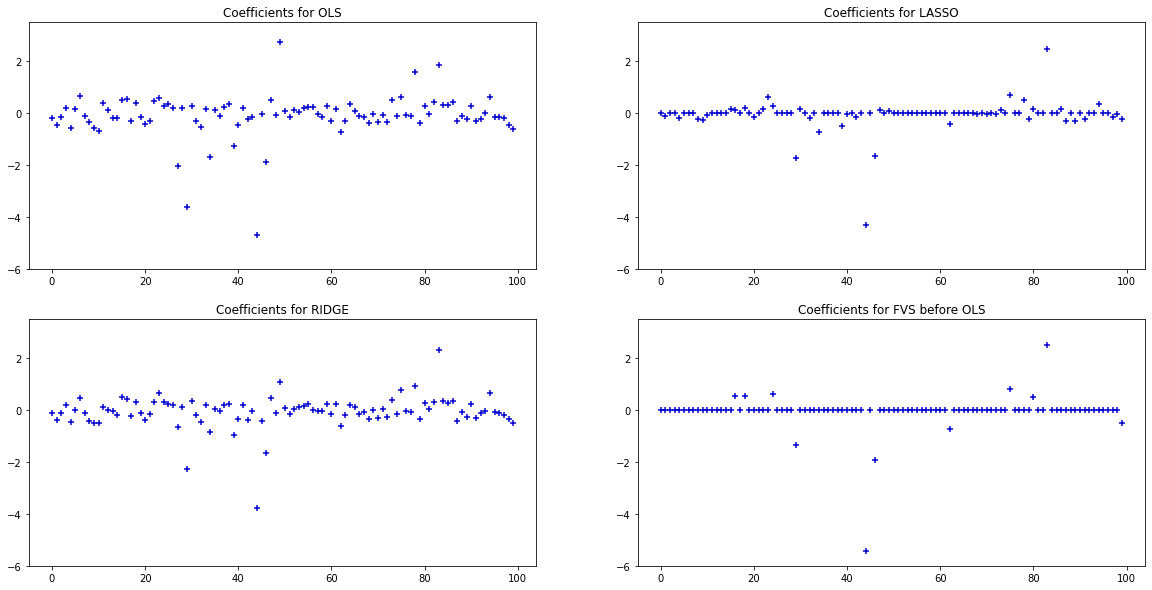

In [67]:
# Coefficients
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.ravel()
abscisse = np.arange(p)

axs[0].scatter(abscisse, df_coef['OLS'], c='mediumblue', marker='+')
axs[0].set_ylim(-6, 3.5)
axs[0].set_title("Coefficients for OLS")

axs[1].scatter(abscisse, df_coef['lasso'], c='mediumblue', marker='+')
axs[1].set_ylim(-6, 3.5)
axs[1].set_title("Coefficients for LASSO")

axs[2].scatter(abscisse, df_coef['Ridge'], c='mediumblue', marker='+')
axs[2].set_ylim(-6, 3.5)
axs[2].set_title("Coefficients for RIDGE")

axs[3].scatter(abscisse, df_coef['FVS'], c='mediumblue', marker='+')
axs[3].set_ylim(-6, 3.5)
axs[3].set_title("Coefficients for FVS before OLS")

We can see that the values of $\theta$ are mostly close to zero even with the OLS methods and therefore there is no significant difference between ridge and OLS. For Lasso and FVS we can see that there are several values equal to zero and the values that aren't zero are the almost all the same for the lasso and FVS method. For now there is no extra value in any of the methods so we can't chose one over the other, we need to compare the MSE.

(0.0, 1.0, 0.0, 1.0)

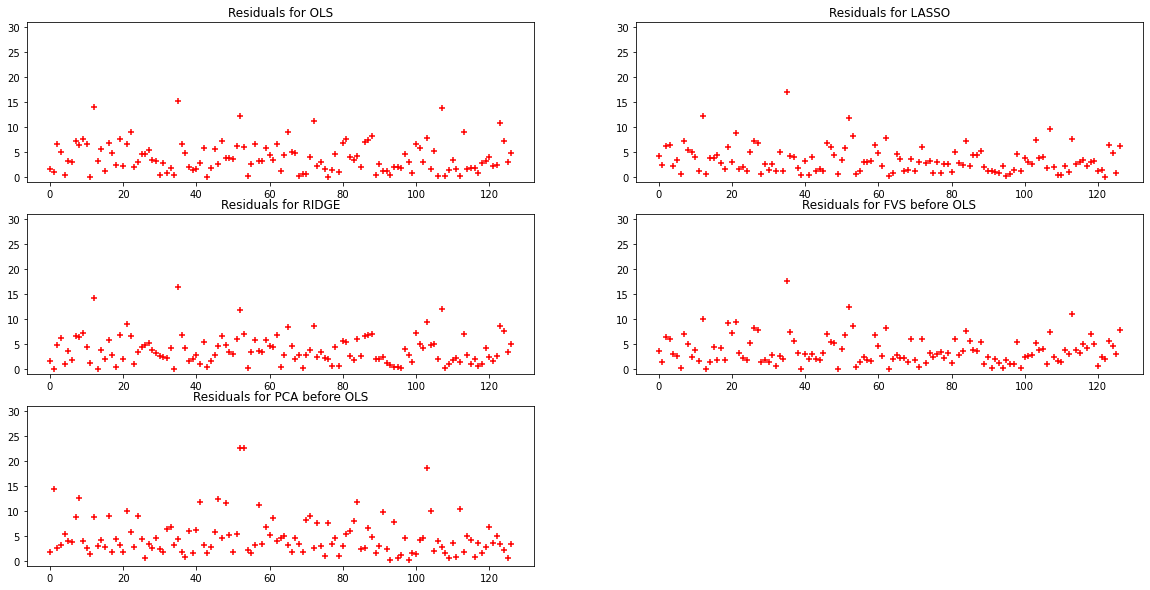

In [68]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
axs = axs.ravel()
abscisse = np.arange(len(Y_test))

axs[0].scatter(abscisse, abs(df_test['OLS']-Y_test), c='red', marker='+')
axs[0].set_title("Residuals for OLS")
axs[0].set_ylim(-1, 31)

axs[1].scatter(abscisse, abs(df_test['lasso']-Y_test), c='r', marker='+')
axs[1].set_title("Residuals for LASSO")
axs[1].set_ylim(-1, 31)

axs[2].scatter(abscisse, abs(df_test['Ridge']-Y_test), c='r', marker='+')
axs[2].set_title("Residuals for RIDGE")
axs[2].set_ylim(-1, 31)

axs[3].scatter(abscisse, abs(df_test['FVS']-Y_test), c='r', marker='+')
axs[3].set_title("Residuals for FVS before OLS")
axs[3].set_ylim(-1, 31)

axs[4].scatter(abscisse, abs(df_test['pca_OLS']-Y_test), c='r', marker='+')
axs[4].set_title("Residuals for PCA before OLS")
axs[4].set_ylim(-1, 31)

axs[5].axis("off")

With the plot of the residuals we can see that some values of Ytest are not well predicted but it is the case for all the methods, but lasso seems good here since the residuals are the closest to zero 

MSE OLS: 25.507603453014084
MSE pca_OLS: 38.85496672672553
MSE lasso: 18.997218528411064
MSE Ridge: 22.946938929887995
MSE FVS: 21.485340034664635


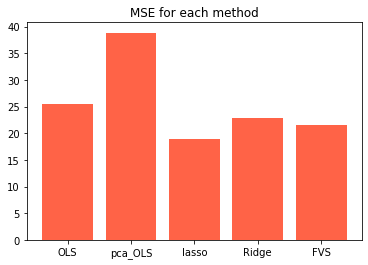

In [69]:
mse = [MSE(Y_test, Y_hat), MSE(Y_test, Y_hat2),
       MSE(Y_test, Y_hat3), MSE(Y_test, Y_hat4), MSE(Y_test, Y_hat5)]
methods = df_test.columns

plt.bar(methods, mse, color='tomato')
plt.title("MSE for each method")
for i in range(5):
    print("MSE " + methods[i] + ":", mse[i])

As we could see above, lasso has the less important MSE, but it is very close to the FVS method. We can notice that PCA before OLS is not a good method, probably because we selected only 2 PC which is a extrem reduction of dimension. Let's see the determination coefficients

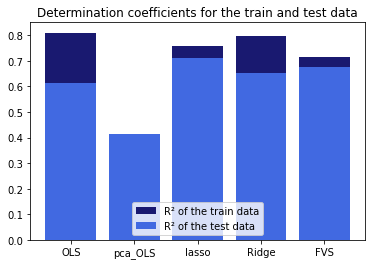

In [70]:
R_2 = [[R2(Y_test, Y_hat), reg.score(X_train_sc, Y_train)],
       [R2(Y_test, Y_hat2), reg2.score(X_train_pca, Y_train)],
       [R2(Y_test, Y_hat3), regLASSO.score(X_train_sc, Y_train)],
       [R2(Y_test, Y_hat4), regRIDGE.score(X_train_sc, Y_train)],
       [R2(Y_test, Y_hat5), regFVS.score(X_train_selected, Y_train)]]

R_2 = np.array(R_2)

plt.bar(methods, R_2[:, 1], color='midnightblue', label='R² of the train data')
plt.bar(methods, R_2[:, 0], color='royalblue', label='R² of the test data')
plt.title("Determination coefficients for the train and test data")
plt.legend(loc='lower center')

Here we can see the issue of overfitting, when the difference of R² with the train data and the test data is high. Regarding avoiding overfitting, lasso, FVS and PCA are good. Finally the best methods seem to be FVS and lasso because they have the lower MSE and don't have big overfitting. To be selective, I'll choose the lasso because the R² and MSE are a little bit better.

# Question 14
- **How many coefficients are set exactly to zero by each of the methods considered in the data frame df_coef? (That is: OLS, Lasso, Ridge and FVS but not PCA before OLS). Why is the number of coefficients set to 0 so different for Lasso and Ridge?**

In [71]:
for val in df_coef.columns:
    print("With " + val, np.count_nonzero(df_coef[val] == 0), "coefficients are set exactly to zero")

With OLS 0 coefficients are set exactly to zero
With lasso 51 coefficients are set exactly to zero
With Ridge 0 coefficients are set exactly to zero
With FVS 89 coefficients are set exactly to zero


**"Why is the number of coefficients set to 0 so different for Lasso and Ridge?"**

- The equation for ridge is : $\mbox{argmin}_{\theta} ||Y- X\theta||^2_2 +\lambda||\theta||_2^2$

When we minimize this expression we impose that the norm2 of theta is small, but does not require the theta to be sparse.

- The equation for ridge is : $\mbox{argmin}_{\theta} ||Y- X\theta||^2_2 +\lambda||\theta||_1$
Here, in order to explain that when we minimize this expression we impose that theta is sparse, we are going to consider the coordinate descent (ie we make a loop over the coordinates) which permits to find a solution :

$\mbox{Let k} \in \{1,..p\} \\
\mbox{We want argmin}_{\theta_k}\frac{1}{2}||Y-X\theta||^2 + \lambda||\theta||_1$


$\mbox{But this minimizer is the soft tresholding function : } \eta_{\frac{\lambda}{||X_k||^2}}\mbox{ and }$

$\eta_\alpha(z) = (|z|-\alpha)_+\mbox{sign}(x) \mbox{ which means that as soon as z is small, the solution is 0. This explain why the LASSO method is sparse}$

# Question 15
- **Give a pairplot of the df_test dataframe.**


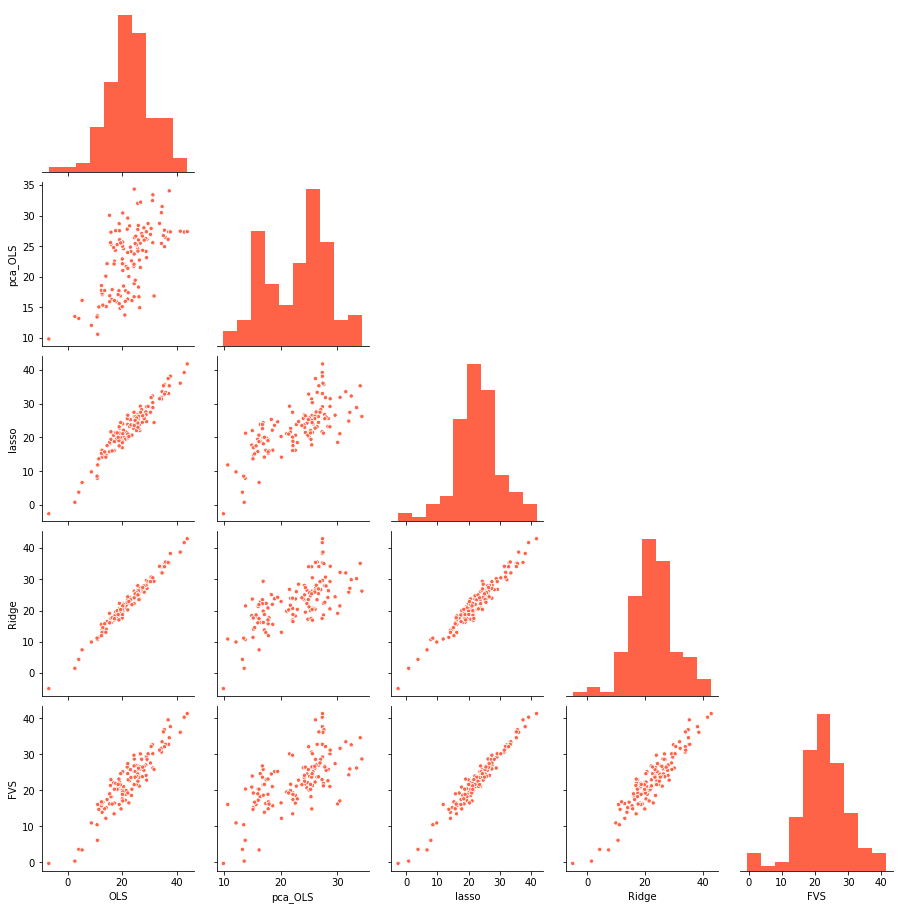

In [72]:
import seaborn
seaborn.pairplot(df_test,
                 plot_kws=dict(size=1, color="tomato"),
                 diag_kws=dict(color="tomato"),
                 corner=True)

Here we notice that the $\hat{Y}$ of ridge and OLS are really close (we can see a diagonal), and it is the same for FVS and Lasso. For the rest they all look close except PCA before OLS. Maybe it would have been better if we selected more than only 2 PC.

- **give the equation to predict the value of a new, unseen data point x.**

For the OLS methods the predicted value of x is : $x_{sc}^T\hat{\theta}^{ols}$ where $x_{sc}$ is standardized x since we have computed $ \hat{\theta}^{ols}$ with scaled data, but it would have been the same result if we had computed OLS with the original data and predict with x not scaled

For the PCA before OLS the predicted value of x is : $x_{sc}^TP_2\hat{\theta}^{pca}$ where $P_2$ is the 2 first columns of U

For lasso it is necessary to standardize x : $x_{sc}^T\hat{\theta}^{ls}$ 

For ridge too : $x_{sc}^T\hat{\theta}^{rd}$ 